In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [298]:
cities = pd.read_csv('../datasets_1368_344954_cities.csv')
stations = pd.read_csv('../stations.csv')
lines = pd.read_csv('../lines.csv')
station_lines = pd.read_csv('../station_lines.csv')

In [299]:
#determine boston city ID to use in other CSV files
cities[cities["name"] == 'Boston']
boston_id = 139

In [300]:
#select only boston stations
boston_stations = stations[stations['city_id'] == boston_id]
boston_stations

,id,name,geometry,buildstart,opening,closure,city_id
9591,14863,Downtown Crossing,POINT(-71.0605452422338 42.3554836649652),1908.0,1908.0,999999.0,139
9592,14764,Babcock Street,POINT(-71.1213762847357 42.3518233645798),1896.0,1896.0,1969.0,139
9593,14765,Pleasant Street,POINT(-71.1186188728083 42.3514860313666),1896.0,1896.0,1969.0,139
9594,14766,St. Paul Street,POINT(-71.1159104312993 42.3511559514473),1896.0,1896.0,1969.0,139
9682,14835,Longwood Medical Area,POINT(-71.1001883183056 42.3358785653442),1883.0,1883.0,999999.0,139
...,...,...,...,...,...,...,...
14574,15191,Franklin,POINT(-71.3960090424284 42.0832927154809),1848.0,1848.0,1973.0,139
14575,15192,Norfolk,POINT(-71.3261011996674 42.120294412191),1848.0,1848.0,1973.0,139
14576,15193,Walpole,POINT(-71.2586450694808 42.1451153888067),1848.0,1848.0,1973.0,139
14578,15194,Plimptonville,POINT(-71.2367123990138 42.1585522303421),1849.0,1849.0,1973.0,139


In [301]:
#look at data, are there NAN values, are there outrageous numbers, which columns will I be using? 
boston_stations.describe()
boston_stations.info()
boston_stations.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 9591 to 14579
Data columns (total 7 columns):
id            374 non-null int64
name          372 non-null object
geometry      374 non-null object
buildstart    374 non-null float64
opening       374 non-null float64
closure       374 non-null float64
city_id       374 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 23.4+ KB


,id,name,geometry,buildstart,opening,closure,city_id
9591,14863,Downtown Crossing,POINT(-71.0605452422338 42.3554836649652),1908.0,1908.0,999999.0,139
9592,14764,Babcock Street,POINT(-71.1213762847357 42.3518233645798),1896.0,1896.0,1969.0,139
9593,14765,Pleasant Street,POINT(-71.1186188728083 42.3514860313666),1896.0,1896.0,1969.0,139
9594,14766,St. Paul Street,POINT(-71.1159104312993 42.3511559514473),1896.0,1896.0,1969.0,139
9682,14835,Longwood Medical Area,POINT(-71.1001883183056 42.3358785653442),1883.0,1883.0,999999.0,139


In [302]:
#there are some dummy closure dates, let's fix those.
boston_stations2= boston_stations.copy()
boston_stations2['closure'] = np.where(boston_stations2['closure'] == 999999.0, np.nan, boston_stations2['closure'])

In [303]:
boston_stations2.head()

,id,name,geometry,buildstart,opening,closure,city_id
9591,14863,Downtown Crossing,POINT(-71.0605452422338 42.3554836649652),1908.0,1908.0,NaN,139
9592,14764,Babcock Street,POINT(-71.1213762847357 42.3518233645798),1896.0,1896.0,1969.0,139
9593,14765,Pleasant Street,POINT(-71.1186188728083 42.3514860313666),1896.0,1896.0,1969.0,139
9594,14766,St. Paul Street,POINT(-71.1159104312993 42.3511559514473),1896.0,1896.0,1969.0,139
9682,14835,Longwood Medical Area,POINT(-71.1001883183056 42.3358785653442),1883.0,1883.0,NaN,139


In [304]:
#make sure there are no duplicates
unique_stations = pd.unique(boston_stations['id'])
len(unique_stations) # since length matches row number, there are no dups.

374

In [305]:
#split geometry column into latitude and longitude
boston_stations3 = boston_stations2.copy()
boston_stations3['geometry'] = boston_stations3['geometry'].str.replace('POINT', '')
boston_stations3['geometry'] = boston_stations3['geometry'].str.replace('(', '')
boston_stations3['geometry'] = boston_stations3['geometry'].str.replace(')', '')
boston_stations3[['latitude','longitude']] = boston_stations3.geometry.str.split(expand=True) 

#drop geometry column
boston_stations3.drop('geometry', axis=1, inplace=True)
boston_stations3


,id,name,buildstart,opening,closure,city_id,latitude,longitude
9591,14863,Downtown Crossing,1908.0,1908.0,NaN,139,-71.0605452422338,42.3554836649652
9592,14764,Babcock Street,1896.0,1896.0,1969.0,139,-71.1213762847357,42.3518233645798
9593,14765,Pleasant Street,1896.0,1896.0,1969.0,139,-71.1186188728083,42.3514860313666
9594,14766,St. Paul Street,1896.0,1896.0,1969.0,139,-71.1159104312993,42.3511559514473
9682,14835,Longwood Medical Area,1883.0,1883.0,NaN,139,-71.1001883183056,42.3358785653442
...,...,...,...,...,...,...,...,...
14574,15191,Franklin,1848.0,1848.0,1973.0,139,-71.3960090424284,42.0832927154809
14575,15192,Norfolk,1848.0,1848.0,1973.0,139,-71.3261011996674,42.120294412191
14576,15193,Walpole,1848.0,1848.0,1973.0,139,-71.2586450694808,42.1451153888067
14578,15194,Plimptonville,1849.0,1849.0,1973.0,139,-71.2367123990138,42.1585522303421


In [306]:
#update latitude and longitude to floats
boston_stations3['latitude'] = boston_stations3['latitude'].astype(float)
boston_stations3['longitude'] = boston_stations3['longitude'].astype(float)
boston_stations3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 9591 to 14579
Data columns (total 8 columns):
id            374 non-null int64
name          372 non-null object
buildstart    374 non-null float64
opening       374 non-null float64
closure       159 non-null float64
city_id       374 non-null int64
latitude      374 non-null float64
longitude     374 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 26.3+ KB


In [307]:
#NEXT GOAL: merge station lines and lines dataframes
#filter out just boston lines, boston station lines
boston_lines = lines[lines['city_id'] == boston_id]
boston_station_lines =station_lines[station_lines['city_id'] == boston_id]

#look at data to figure out which column to merge on
boston_lines

,id,city_id,name,url_name,color,system_id,transport_mode_id
1047,1133,139,Green Line/A,1133-a,#008150,110,9.0
1074,1128,139,Orange Line,1128-orange-line,#fd8a03,110,4.0
1075,1129,139,Blue Line,1129-blue-line,#2f5da6,110,4.0
1077,1130,139,Red Line,1130-red-line,#fa2d27,110,4.0
1078,1132,139,Hyannis,1132-hyannis,#78bc42,423,3.0
1079,1131,139,Mattapan Line,1131-mattapan-line,#fa2d27,110,5.0
1081,1134,139,Green Line/B,1134-b,#008150,110,5.0
1115,1136,139,Green Line/D,1136-d,#008150,110,5.0
1277,1372,139,Highland Branch,1372-highland-branch,#000000,502,3.0
1278,1135,139,Green Line/C,1135-c,#008150,110,5.0


In [308]:
boston_station_lines

,id,station_id,line_id,city_id,created_at,updated_at
7300,15493,15159,1413,139,2018-10-31 14:30:58.354283,2018-10-31 14:30:58.354283
7301,15494,15160,1425,139,2018-10-31 14:31:40.646995,2018-10-31 14:31:40.646995
7302,15495,15161,1413,139,2018-10-31 14:36:11.493451,2018-10-31 14:36:11.493451
7303,15496,15162,1425,139,2018-10-31 14:37:04.80339,2018-10-31 14:37:04.80339
7304,15497,15163,1425,139,2018-10-31 14:38:45.265995,2018-10-31 14:38:45.265995
...,...,...,...,...,...,...
13171,15418,15084,1425,139,2018-10-29 20:17:36.139122,2018-10-29 20:17:36.139122
13172,15419,15085,1425,139,2018-10-29 20:18:41.183153,2018-10-29 20:18:41.183153
13173,15420,15086,1425,139,2018-10-29 20:23:03.765749,2018-10-29 20:23:03.765749
13174,15421,15087,1425,139,2018-10-29 20:23:50.028926,2018-10-29 20:23:50.028926


In [309]:
# looks like they will be merged on boston_lines ID to boston_station_lines LINE_ID
boston_lines_colors = pd.merge(boston_lines, boston_station_lines, left_on='id', right_on='line_id')
boston_lines_colors

,id_x,city_id_x,name,url_name,color,system_id,transport_mode_id,id_y,station_id,line_id,city_id_y,created_at,updated_at
0,1133,139,Green Line/A,1133-a,#008150,110,9.0,15066,14754,1133,139,2018-10-17 21:10:33.006975,2018-10-17 21:10:33.006975
1,1133,139,Green Line/A,1133-a,#008150,110,9.0,15067,14755,1133,139,2018-10-17 21:10:55.890751,2018-10-17 21:10:55.890751
2,1133,139,Green Line/A,1133-a,#008150,110,9.0,15076,14764,1133,139,2018-10-18 15:19:50.105937,2018-10-18 15:19:50.105937
3,1133,139,Green Line/A,1133-a,#008150,110,9.0,15077,14765,1133,139,2018-10-18 15:20:11.56982,2018-10-18 15:20:11.56982
4,1133,139,Green Line/A,1133-a,#008150,110,9.0,15078,14766,1133,139,2018-10-18 15:20:31.189616,2018-10-18 15:20:31.189616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1137,139,Green Line/E,1137-e,#008150,110,5.0,15158,14841,1137,139,2018-10-18 20:35:59.238663,2018-10-18 20:35:59.238663
368,1137,139,Green Line/E,1137-e,#008150,110,5.0,15159,14842,1137,139,2018-10-18 20:36:23.32983,2018-10-18 20:36:23.32983
369,1137,139,Green Line/E,1137-e,#008150,110,5.0,15160,14843,1137,139,2018-10-18 20:37:43.358355,2018-10-18 20:37:43.358355
370,1137,139,Green Line/E,1137-e,#008150,110,5.0,15120,14803,1137,139,2018-10-18 18:30:58.385915,2018-10-18 18:30:58.385915


In [310]:
#only keep id, name, station_id
boston_colors = boston_lines_colors[['id_x','name','color','station_id']]
boston_colors

,id_x,name,color,station_id
0,1133,Green Line/A,#008150,14754
1,1133,Green Line/A,#008150,14755
2,1133,Green Line/A,#008150,14764
3,1133,Green Line/A,#008150,14765
4,1133,Green Line/A,#008150,14766
...,...,...,...,...
367,1137,Green Line/E,#008150,14841
368,1137,Green Line/E,#008150,14842
369,1137,Green Line/E,#008150,14843
370,1137,Green Line/E,#008150,14803


In [311]:
#merge boston_colors with boston_stations3
#look at both data frames to figure out which column to merge on
boston_stations3.head()

,id,name,buildstart,opening,closure,city_id,latitude,longitude
9591,14863,Downtown Crossing,1908.0,1908.0,NaN,139,-71.060545,42.355484
9592,14764,Babcock Street,1896.0,1896.0,1969.0,139,-71.121376,42.351823
9593,14765,Pleasant Street,1896.0,1896.0,1969.0,139,-71.118619,42.351486
9594,14766,St. Paul Street,1896.0,1896.0,1969.0,139,-71.115910,42.351156
9682,14835,Longwood Medical Area,1883.0,1883.0,NaN,139,-71.100188,42.335879


In [312]:
# merge on id and station_id
boston_stations4 = pd.merge(boston_stations3,boston_colors, left_on='id', right_on='station_id', how='left')
boston_stations4

,id,name_x,buildstart,opening,closure,city_id,latitude,longitude,id_x,name_y,color,station_id
0,14863,Downtown Crossing,1908.0,1908.0,NaN,139,-71.060545,42.355484,1128.0,Orange Line,#fd8a03,14863.0
1,14764,Babcock Street,1896.0,1896.0,1969.0,139,-71.121376,42.351823,1133.0,Green Line/A,#008150,14764.0
2,14765,Pleasant Street,1896.0,1896.0,1969.0,139,-71.118619,42.351486,1133.0,Green Line/A,#008150,14765.0
3,14766,St. Paul Street,1896.0,1896.0,1969.0,139,-71.115910,42.351156,1133.0,Green Line/A,#008150,14766.0
4,14835,Longwood Medical Area,1883.0,1883.0,NaN,139,-71.100188,42.335879,1137.0,Green Line/E,#008150,14835.0
...,...,...,...,...,...,...,...,...,...,...,...,...
369,15191,Franklin,1848.0,1848.0,1973.0,139,-71.396009,42.083293,1419.0,Midland Line,#000,15191.0
370,15192,Norfolk,1848.0,1848.0,1973.0,139,-71.326101,42.120294,1419.0,Midland Line,#000,15192.0
371,15193,Walpole,1848.0,1848.0,1973.0,139,-71.258645,42.145115,1419.0,Midland Line,#000,15193.0
372,15194,Plimptonville,1849.0,1849.0,1973.0,139,-71.236712,42.158552,1419.0,Midland Line,#000,15194.0


In [313]:
#group by colors 
grouped_df = boston_stations4.groupby(['color','name_y']).count()

grouped_df

id  name_x  buildstart  opening  closure  \
color   name_y                                                                
#000    Charles River Branch        3       3           3        3        3   
        Main Line                  42      42          42       42       42   
        Midland Line               19      19          19       19       19   
        Needham Branch              7       7           7        7        7   
        Stoughton Branch            3       3           3        3        3   
#000000 Fitchburg Line             24      24          24       24       24   
        Highland Branch            12      12          12       12       12   
#008150 Green Line                 18      18          18       18        5   
        Green Line/A               10      10          10       10       10   
        Green Line/B               19      19          19       19        3   
        Green Line/C               14      14          14       14        2   
        Green Line/D               21      21          21       21        2   
        Green Line/E               10      10          10       10        0   
#2f5da6 Blue Line                  13      13          13       13        1   
#bd10e0 Fairmount Line              9       9           9        9        0   
        Fitchburg Line             20      20          20       20        2   
        Framingham/Worcester Line  19      19          19       19        1   
        Franklin Line              15      14          15       15        2   
        Needham Line               12      12          12       12        0   
        Providence/Stoughton Line  13      13          13       13        1   
#fa2d27 Mattapan Line               8       8           8        8        0   
        Red Line                   22      22          22       22        0   
#fd8a03 Atlantic Avenue Line        5       5           5        5        5   
        Orange Line                34      34          34       34       14   

                                   city_id  latitude  longitude  id_x  \
color   name_y                                                          
#000    Charles River Branch             3         3          3     3   
        Main Line                       42        42         42    42   
        Midland Line                    19        19         19    19   
        Needham Branch                   7         7          7     7   
        Stoughton Branch                 3         3          3     3   
#000000 Fitchburg Line                  24        24         24    24   
        Highland Branch                 12        12         12    12   
#008150 Green Line                      18        18         18    18   
        Green Line/A                    10        10         10    10   
        Green Line/B                    19        19         19    19   
        Green Line/C                    14        14         14    14   
        Green Line/D                    21        21         21    21   
        Green Line/E                    10        10         10    10   
#2f5da6 Blue Line                       13        13         13    13   
#bd10e0 Fairmount Line                   9         9          9     9   
        Fitchburg Line                  20        20         20    20   
        Framingham/Worcester Line       19        19         19    19   
        Franklin Line                   15        15         15    15   
        Needham Line                    12        12         12    12   
        Providence/Stoughton Line       13        13         13    13   
#fa2d27 Mattapan Line                    8         8          8     8   
        Red Line                        22        22         22    22   
#fd8a03 Atlantic Avenue Line             5         5          5     5   
        Orange Line                     34        34         34    34   

                                   station_id  
color   name_y                   

In [314]:
#defining colors
black, grey, green, blue, purple, red, orange =  '#000','#000000','#008150','#2f5da6','#bd10e0', '#fa2d27', '#fd8a03'
color_list = [black, grey, green, blue, purple, red, orange]
all_colors = ['black', 'grey', 'green', 'blue', 'purple', 'red', 'orange']

In [326]:
#function to create separate dataframes for each color as of 1972
def stations_by_color_closed_before_1972(df ,colorlist):
    color1972_list = []
    for color in color_list: 
        color1972_list.append(df[(df['color'] == color) & (df['opening'] < 1972) &((df['closure'] > 1972)|(df['closure'].isna()))])
    
    return color1972_list

In [327]:
color1972_list = stations_by_color_closed_before_1972(boston_stations4, color_list)
color1972_list 

[        id                   name_x  buildstart  opening  closure  city_id  \
 31   14993          Needham Heights      1906.0   1906.0   1979.0      139   
 34   14996         Needham Junction      1906.0   1906.0   1979.0      139   
 35   14997              Bird's Hill      1917.0   1917.0   1979.0      139   
 37   14994             West Roxbury      1835.0   1835.0   1979.0      139   
 39   15000                 Highland      1835.0   1835.0   1979.0      139   
 40   15001                 Bellevue      1835.0   1835.0   1979.0      139   
 41   14995                  Needham      1852.0   1852.0   1979.0      139   
 47   15175  Pawtucket-Central Falls      1916.0   1916.0   1973.0      139   
 184  14913            South Station      1899.0   1899.0   1973.0      139   
 243  14971                 Back Bay      1880.0   1880.0   1973.0      139   
 244  14972              West Newton      1834.0   1834.0   1973.0      139   
 245  14973              Newtonville      1842.0   1

In [317]:
#function to create separate dataframes for each color as of today
def stations_by_color_2020(df ,colorlist):
    color2020_list = []
    for color in color_list: 
        color2020_list.append(df[(df['color'] == color) & (df['closure'].isna())])
    
    return color2020_list

In [318]:
color2020_list = stations_by_color_2020(boston_stations4, color_list)
color2020_list

[Empty DataFrame
 Columns: [id, name_x, buildstart, opening, closure, city_id, latitude, longitude, id_x, name_y, color, station_id]
 Index: [], Empty DataFrame
 Columns: [id, name_x, buildstart, opening, closure, city_id, latitude, longitude, id_x, name_y, color, station_id]
 Index: [],         id                     name_x  buildstart  opening  closure  city_id  \
 4    14835      Longwood Medical Area      1883.0   1883.0      NaN      139   
 5    14836             Brigham Circle      1859.0   1859.0      NaN      139   
 61   14722                      Waban      1959.0   1959.0      NaN      139   
 62   14723                      Eliot      1959.0   1959.0      NaN      139   
 63   14751  Boston University Central      1900.0   1900.0      NaN      139   
 ..     ...                        ...         ...      ...      ...      ...   
 189  14916                   Lechmere      2021.0   2021.0      NaN      139   
 190  14917            East Somerville      2021.0   2021.0     

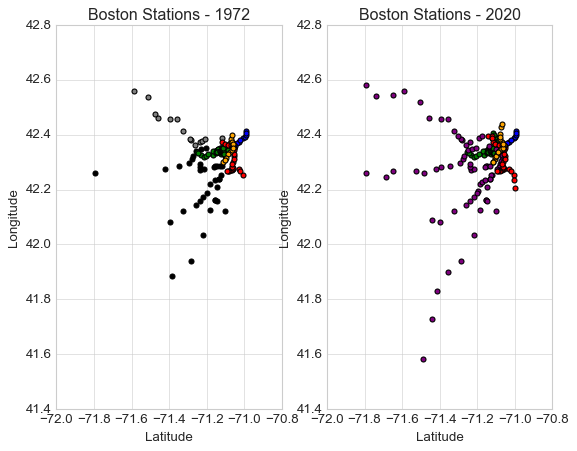

In [328]:
#scatterplot as of 1972 with x as lat y as long. include stations opened before 1972 AND not closed before 1972
fig, axs = plt.subplots(1,2)

ax = axs[0]
for i in range(len(color1972_list)):
    ax.scatter(color1972_list[i]['latitude'], color1972_list[i]['longitude'], c=all_colors[i], label=all_colors[i])
ax.set_ylim([41.8,42.8])
ax.set_yticks([41.4,41.6,41.8,42.0,42.2,42.4,42.6,42.8])
ax.set_title('Boston Stations - 1972')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')


#scatterplot as of 2020 with x as lat y as long. include stations without a closure date
ax = axs[1]
for i in range(len(color2020_list)):
    ax.scatter(color2020_list[i]['latitude'], color2020_list[i]['longitude'], c=all_colors[i],label=all_colors[i])
ax.set_title('Boston Stations - 2020')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')


plt.show()

In [329]:
plt.savefig("boston_station_map_1972_2020.jpg")

<Figure size 640x480 with 0 Axes>